# **Pre-Processing, Cleaning and Exploratory Data Analysis Metered Load Dataset**

### **1. Data Pre-processing**

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime

#For Plotting:
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
plt.style.use('fivethirtyeight')

from pylab import rcParams
rcParams['figure.figsize'] = 11, 9 

### **2. Importing Data sets**

In [2]:
data1= pd.read_csv('C:/Users/Sheethal/Downloads/Data Programming Project/gen_by_fuel - 2020.csv')
data2= pd.read_csv('C:/Users/Sheethal/Downloads/Data Programming Project/gen_by_fuel - 2021.csv')


### **3. Appending the Imported Datasets**

In [3]:
data=pd.concat([data1, data2], axis=0)
data.to_csv('C:/Users/Sheethal/Downloads/Data Programming Project/gen_by_fuel-combined.csv', index=False) 
data_copy = data.copy(deep=True) # Make a copy of the data and the indices
data.head(10)

,datetime_beginning_utc,datetime_beginning_ept,fuel_type,mw,fuel_percentage_of_total,is_renewable
0,12/31/2020 5:00:00 AM,12/31/2020 12:00:00 AM,Coal,17326.3,0.19,False
1,12/31/2020 5:00:00 AM,12/31/2020 12:00:00 AM,Gas,30767.9,0.35,False
2,12/31/2020 5:00:00 AM,12/31/2020 12:00:00 AM,Hydro,1747.7,0.02,True
3,12/31/2020 5:00:00 AM,12/31/2020 12:00:00 AM,Multiple Fuels,125.5,0.00,False
4,12/31/2020 5:00:00 AM,12/31/2020 12:00:00 AM,Nuclear,33996.5,0.38,False
5,12/31/2020 5:00:00 AM,12/31/2020 12:00:00 AM,Oil,189.0,0.00,False
6,12/31/2020 5:00:00 AM,12/31/2020 12:00:00 AM,Other,81.4,0.00,False
7,12/31/2020 5:00:00 AM,12/31/2020 12:00:00 AM,Other Renewables,533.8,0.01,True
8,12/31/2020 5:00:00 AM,12/31/2020 12:00:00 AM,Solar,9.3,0.00,True
9,12/31/2020 5:00:00 AM,12/31/2020 12:00:00 AM,Storage,0.0,0.00,False


### **4. Removing columns that are not required**

In [4]:
data.drop(["datetime_beginning_utc","is_renewable"], axis = 1, inplace=True)
data.head(10)

,datetime_beginning_ept,fuel_type,mw,fuel_percentage_of_total
0,12/31/2020 12:00:00 AM,Coal,17326.3,0.19
1,12/31/2020 12:00:00 AM,Gas,30767.9,0.35
2,12/31/2020 12:00:00 AM,Hydro,1747.7,0.02
3,12/31/2020 12:00:00 AM,Multiple Fuels,125.5,0.00
4,12/31/2020 12:00:00 AM,Nuclear,33996.5,0.38
5,12/31/2020 12:00:00 AM,Oil,189.0,0.00
6,12/31/2020 12:00:00 AM,Other,81.4,0.00
7,12/31/2020 12:00:00 AM,Other Renewables,533.8,0.01
8,12/31/2020 12:00:00 AM,Solar,9.3,0.00
9,12/31/2020 12:00:00 AM,Storage,0.0,0.00


### **5. Renaming Column Names**

In [5]:
data=data.rename(columns={'fuel_type': 'Fuel_Type','datetime_beginning_ept': 'Time_Stamp', 'mw': 'MW_Generated','fuel_percentage_of_total':'Fuel_Percentage_of_Total'})
data.head(10)

,Time_Stamp,Fuel_Type,MW_Generated,Fuel_Percentage_of_Total
0,12/31/2020 12:00:00 AM,Coal,17326.3,0.19
1,12/31/2020 12:00:00 AM,Gas,30767.9,0.35
2,12/31/2020 12:00:00 AM,Hydro,1747.7,0.02
3,12/31/2020 12:00:00 AM,Multiple Fuels,125.5,0.00
4,12/31/2020 12:00:00 AM,Nuclear,33996.5,0.38
5,12/31/2020 12:00:00 AM,Oil,189.0,0.00
6,12/31/2020 12:00:00 AM,Other,81.4,0.00
7,12/31/2020 12:00:00 AM,Other Renewables,533.8,0.01
8,12/31/2020 12:00:00 AM,Solar,9.3,0.00
9,12/31/2020 12:00:00 AM,Storage,0.0,0.00


### **6. Writing a Helper function to get some analytics metrics**

In [6]:
class Analysis():

    df = pd.DataFrame()
    
    def __init__(self, df):
     
        self.df = df
        
    def missing_values(self): #to check for missing values
      
        missing_data = self.df[self.df.isna().any(axis=1)]
        
        print("Missing values in the dataset:")
        
        return missing_data
    
    def duplicate_values(self): #to check for duplicate values
        duplicate_data = self.df[self.df.duplicated(subset=None, keep='first')==True]
        
        print("Duplicate values in the dataset:")
        
        return duplicate_data
            
    def summary(self): #to describe the dataset
       
        df = self.df.reset_index() # Reset to include the index
        datetime_is_numeric=True
        summary_data = df.describe(include='all').transpose()
        print("Summary of the Dataset:")
        
        return summary_data
    
    def duplicate_indices(self): #checking if thre are duplicate indices
  
        duplicate_indices = self.df[self.df.index.duplicated()==True]
        
        print("Duplicate indices:")
        
        return duplicate_indices
    
   
    def outliers(self, col): #checks outliers that lie outside 5% to 95% Quartiles
       
        outliers = self.df[~self.df[col].between(self.df[col].quantile(.05), self.df[col].quantile(.95))]
        
        print("Dataset Outliers:")
        
        return outliers
        
    def missing_timeseries_points(self, freq='D'): #to check if there is missing data in continuos time series data
      
        # Creation of a date range
        date_range = pd.date_range(start=data.index.min(), end=data.index.max(), freq=freq)

        # Comparing the created date range against dataset
        missing_timeseries = self.df.index[~self.df.index.isin(date_range)]
        
        print("Missing timeseries result:")
        
        return missing_timeseries


### **7. Exploratory Data Analysis and Cleaning**

In [7]:
EDA = Analysis(data)

EDA.summary() 

Summary of the Dataset:


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
index,192423.0,NaN,NaN,NaN,48105.38221,27774.168873,0.0,24052.5,48105.0,72158.0,96370.0
Time_Stamp,192423,17496,11/7/2021 1:00:00 AM,22,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fuel_Type,192423,11,Coal,17498,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MW_Generated,192423.0,NaN,NaN,NaN,8510.823239,13520.033459,0.0,103.3,703.7,13732.5,69456.4
Fuel_Percentage_of_Total,192423.0,NaN,NaN,NaN,0.090632,0.141918,0.0,0.0,0.01,0.16,0.52


In [8]:
EDA.missing_values() #no missing values found

Missing values in the dataset:


,Time_Stamp,Fuel_Type,MW_Generated,Fuel_Percentage_of_Total


In [9]:
EDA.duplicate_values()

Duplicate values in the dataset:


,Time_Stamp,Fuel_Type,MW_Generated,Fuel_Percentage_of_Total
15848,11/1/2020 1:00:00 AM,Solar,2.6,0.0
15849,11/1/2020 1:00:00 AM,Storage,0.0,0.0
14264,11/7/2021 1:00:00 AM,Solar,13.2,0.0
14265,11/7/2021 1:00:00 AM,Storage,0.0,0.0


In [10]:
EDA.missing_timeseries_points() #no missing timeseries points

Missing timeseries result:


Int64Index([    0,     1,     2,     3,     4,     5,     6,     7,     8,
                9,
            ...
            96042, 96043, 96044, 96045, 96046, 96047, 96048, 96049, 96050,
            96051],
           dtype='int64', length=192423)

In [11]:
EDA.duplicate_indices() #Even though the indices are duplicates, the records themselves hold different information

Duplicate indices:


,Time_Stamp,Fuel_Type,MW_Generated,Fuel_Percentage_of_Total
0,12/31/2021 12:00:00 AM,Coal,16137.0,0.19
1,12/31/2021 12:00:00 AM,Gas,30443.0,0.36
2,12/31/2021 12:00:00 AM,Hydro,618.2,0.01
3,12/31/2021 12:00:00 AM,Multiple Fuels,3.2,0.00
4,12/31/2021 12:00:00 AM,Nuclear,33783.0,0.40
...,...,...,...,...
96047,1/1/2021 12:00:00 AM,Other,95.9,0.00
96048,1/1/2021 12:00:00 AM,Other Renewables,546.9,0.01
96049,1/1/2021 12:00:00 AM,Solar,9.3,0.00
96050,1/1/2021 12:00:00 AM,Storage,0.0,0.00


#### **Cleaning Data - Removing Duplicates**

In [12]:
data.shape #Before removing duplicates

(192423, 4)

In [13]:
data = data.drop_duplicates(keep='first') #removing duplicate rows but keeping the first one
data.shape #checking after the elimination of duplicate rows

(192419, 4)

In [14]:
EDA1 = Analysis(data)
EDA1.duplicate_values() #Duplicates have been removed

Duplicate values in the dataset:


,Time_Stamp,Fuel_Type,MW_Generated,Fuel_Percentage_of_Total


#### Cleaning Data - Handling Duplicate indices (Not removing them as we need the information within those records)

In [15]:
data_grouped=data.groupby(['Time_Stamp','Fuel_Type'],as_index=False).sum()
data_grouped

,Time_Stamp,Fuel_Type,MW_Generated,Fuel_Percentage_of_Total
0,1/1/2020 10:00:00 AM,Coal,11851.4,0.14
1,1/1/2020 10:00:00 AM,Gas,33401.4,0.39
2,1/1/2020 10:00:00 AM,Hydro,1236.3,0.01
3,1/1/2020 10:00:00 AM,Multiple Fuels,3.2,0.00
4,1/1/2020 10:00:00 AM,Nuclear,33038.6,0.38
...,...,...,...,...
192396,9/9/2021 9:00:00 PM,Other,39.4,0.00
192397,9/9/2021 9:00:00 PM,Other Renewables,643.8,0.00
192398,9/9/2021 9:00:00 PM,Solar,9.6,0.00
192399,9/9/2021 9:00:00 PM,Storage,0.0,0.00


In [16]:
EDA2 = Analysis(data_grouped)
EDA2.duplicate_indices() #Duplicate indices have been removed

Duplicate indices:


,Time_Stamp,Fuel_Type,MW_Generated,Fuel_Percentage_of_Total


### **Getting Yearwise Data - to use later**

In [17]:
data_grouped_copy = data_grouped.copy(deep=True) #Making a copy of grouped data
data_grouped_copy['Time_Stamp'] = pd.to_datetime(data_grouped_copy['Time_Stamp'])
data_grouped_copy['Time_Stamp']= data_grouped_copy['Time_Stamp'].dt.year
data_yearwise=data_grouped_copy.groupby(['Time_Stamp','Fuel_Type'], as_index=False).agg({'MW_Generated':'sum', 'Fuel_Percentage_of_Total':'sum'})
data_yearwise

,Time_Stamp,Fuel_Type,MW_Generated,Fuel_Percentage_of_Total
0,2020,Coal,155831826.2,1648.46
1,2020,Gas,317508553.4,3403.51
2,2020,Hydro,16172434.9,169.52
3,2020,Multiple Fuels,5410718.9,57.12
4,2020,Nuclear,276097123.4,3063.56
5,2020,Oil,2055600.4,4.23
6,2020,Other,399517.2,0.00
7,2020,Other Renewables,5219926.0,58.56
8,2020,Solar,3435161.6,34.57
9,2020,Storage,0.0,0.00


### **8. Saving cleaned Dataset to a new file**

In [18]:
data_grouped.to_csv('C:/Users/Sheethal/Downloads/Data Programming Project/gen-by-fuel-cleaned.csv', index=False) 

### **9. Checking outliers for each feature**


In [19]:
data_grouped_copy1 = data_grouped.copy(deep=True) #Making a copy of grouped data
EDA3 = Analysis(data_grouped_copy1)
data_grouped_copy1['Time_Stamp'] = pd.to_datetime(data_grouped_copy1['Time_Stamp'])
EDA3.outliers('Time_Stamp') 
#The outliers should be removed if they are there due to data quality issues and the onles that trule happened need to be kept. So, in this case we will keep them.

Dataset Outliers:


,Time_Stamp,Fuel_Type,MW_Generated,Fuel_Percentage_of_Total
0,2020-01-01 10:00:00,Coal,11851.4,0.14
1,2020-01-01 10:00:00,Gas,33401.4,0.39
2,2020-01-01 10:00:00,Hydro,1236.3,0.01
3,2020-01-01 10:00:00,Multiple Fuels,3.2,0.00
4,2020-01-01 10:00:00,Nuclear,33038.6,0.38
...,...,...,...,...
77622,2020-02-06 09:00:00,Other,55.9,0.00
77623,2020-02-06 09:00:00,Other Renewables,525.0,0.00
77624,2020-02-06 09:00:00,Solar,17.6,0.00
77625,2020-02-06 09:00:00,Storage,0.0,0.00


In [20]:
EDA3.outliers('MW_Generated')  #the outliers have meaningful data so we will keep them

Dataset Outliers:


,Time_Stamp,Fuel_Type,MW_Generated,Fuel_Percentage_of_Total
12,2020-01-01 22:00:00,Gas,34737.8,0.38
166,2020-01-01 17:00:00,Gas,36929.8,0.40
188,2020-01-01 18:00:00,Gas,37956.4,0.40
210,2020-01-01 19:00:00,Gas,38411.6,0.40
232,2020-01-01 20:00:00,Gas,38236.5,0.40
...,...,...,...,...
192347,2021-09-09 19:00:00,Gas,43583.5,0.41
192358,2021-09-09 08:00:00,Gas,37240.7,0.39
192369,2021-09-09 20:00:00,Gas,43730.9,0.42
192380,2021-09-09 09:00:00,Gas,39189.4,0.40


In [21]:
EDA3.outliers('Fuel_Percentage_of_Total')  #we don't need any other fuel types apart from Wind and Solar so, all the others can be discarded

Dataset Outliers:


,Time_Stamp,Fuel_Type,MW_Generated,Fuel_Percentage_of_Total
70,2020-01-01 01:00:00,Nuclear,33082.9,0.40
92,2020-01-01 02:00:00,Nuclear,33070.3,0.41
114,2020-01-01 03:00:00,Nuclear,32941.6,0.41
136,2020-01-01 04:00:00,Nuclear,32944.7,0.40
158,2020-01-01 05:00:00,Nuclear,32956.4,0.40
...,...,...,...,...
192303,2021-09-09 17:00:00,Gas,43627.9,0.40
192325,2021-09-09 18:00:00,Gas,44644.8,0.41
192347,2021-09-09 19:00:00,Gas,43583.5,0.41
192369,2021-09-09 20:00:00,Gas,43730.9,0.42


In [22]:
data_grouped_copy1.Fuel_Type.unique() #Since we need only Solar and Wind Generation, all the others would be considered outliers

array(['Coal', 'Gas', 'Hydro', 'Multiple Fuels', 'Nuclear', 'Oil',
       'Other', 'Other Renewables', 'Solar', 'Storage', 'Wind'],
      dtype=object)

In [23]:
#Keeping only Wind and Solar Data
renew=data_grouped_copy1[(data_grouped_copy1["Fuel_Type"]=="Solar") | (data_grouped_copy1["Fuel_Type"]=="Wind")]
renew

,Time_Stamp,Fuel_Type,MW_Generated,Fuel_Percentage_of_Total
8,2020-01-01 10:00:00,Solar,911.2,0.01
10,2020-01-01 10:00:00,Wind,4443.8,0.05
19,2020-01-01 22:00:00,Solar,0.0,0.00
21,2020-01-01 22:00:00,Wind,7696.1,0.08
30,2020-01-01 11:00:00,Solar,974.1,0.01
...,...,...,...,...
192378,2021-09-09 20:00:00,Wind,1010.9,0.01
192387,2021-09-09 09:00:00,Solar,748.4,0.01
192389,2021-09-09 09:00:00,Wind,286.6,0.00
192398,2021-09-09 21:00:00,Solar,9.6,0.00


In [24]:
renew_copy = renew.copy(deep=True) #Making a copy of grouped data

### **10. Creating Heatmaps**

#### For Weekly data:

In [25]:
import warnings
warnings.filterwarnings("ignore")
weekdays_data=renew
weekdays_data['Weekday_Name'] = weekdays_data['Time_Stamp'].apply(lambda x: x.dayofweek)
mapping = {0:'Monday',1:'Tuesday',2:'Wednesday',3:'Thursday',4:'Friday',5:'Saturday',6:'Sunday'}
weekdays_data['Weekday_Name'] = weekdays_data['Weekday_Name'].map(mapping)
weekdays_data

,Time_Stamp,Fuel_Type,MW_Generated,Fuel_Percentage_of_Total,Weekday_Name
8,2020-01-01 10:00:00,Solar,911.2,0.01,Wednesday
10,2020-01-01 10:00:00,Wind,4443.8,0.05,Wednesday
19,2020-01-01 22:00:00,Solar,0.0,0.00,Wednesday
21,2020-01-01 22:00:00,Wind,7696.1,0.08,Wednesday
30,2020-01-01 11:00:00,Solar,974.1,0.01,Wednesday
...,...,...,...,...,...
192378,2021-09-09 20:00:00,Wind,1010.9,0.01,Thursday
192387,2021-09-09 09:00:00,Solar,748.4,0.01,Thursday
192389,2021-09-09 09:00:00,Wind,286.6,0.00,Thursday
192398,2021-09-09 21:00:00,Solar,9.6,0.00,Thursday


#### For Yearly data:

In [26]:
year_week_data=weekdays_data
year_week_data['Year'] =  year_week_data['Time_Stamp'].dt.year
year_week_data

,Time_Stamp,Fuel_Type,MW_Generated,Fuel_Percentage_of_Total,Weekday_Name,Year
8,2020-01-01 10:00:00,Solar,911.2,0.01,Wednesday,2020
10,2020-01-01 10:00:00,Wind,4443.8,0.05,Wednesday,2020
19,2020-01-01 22:00:00,Solar,0.0,0.00,Wednesday,2020
21,2020-01-01 22:00:00,Wind,7696.1,0.08,Wednesday,2020
30,2020-01-01 11:00:00,Solar,974.1,0.01,Wednesday,2020
...,...,...,...,...,...,...
192378,2021-09-09 20:00:00,Wind,1010.9,0.01,Thursday,2021
192387,2021-09-09 09:00:00,Solar,748.4,0.01,Thursday,2021
192389,2021-09-09 09:00:00,Wind,286.6,0.00,Thursday,2021
192398,2021-09-09 21:00:00,Solar,9.6,0.00,Thursday,2021


#### For Hourly data:

In [27]:
year_week_data['Hour'] =  year_week_data['Time_Stamp'].dt.hour
year_week_data

,Time_Stamp,Fuel_Type,MW_Generated,Fuel_Percentage_of_Total,Weekday_Name,Year,Hour
8,2020-01-01 10:00:00,Solar,911.2,0.01,Wednesday,2020,10
10,2020-01-01 10:00:00,Wind,4443.8,0.05,Wednesday,2020,10
19,2020-01-01 22:00:00,Solar,0.0,0.00,Wednesday,2020,22
21,2020-01-01 22:00:00,Wind,7696.1,0.08,Wednesday,2020,22
30,2020-01-01 11:00:00,Solar,974.1,0.01,Wednesday,2020,11
...,...,...,...,...,...,...,...
192378,2021-09-09 20:00:00,Wind,1010.9,0.01,Thursday,2021,20
192387,2021-09-09 09:00:00,Solar,748.4,0.01,Thursday,2021,9
192389,2021-09-09 09:00:00,Wind,286.6,0.00,Thursday,2021,9
192398,2021-09-09 21:00:00,Solar,9.6,0.00,Thursday,2021,21


#### Seasonality by month:

In [28]:
year_week_data['Month'] = year_week_data['Time_Stamp'].apply(lambda x: x.month)
mapping = {1:'January',2:'February',3:'March',4:'April',5:'May',6:'June',7:'July',8:'August',9:'September',10:'October',11:'November',12:'December'}
year_week_data['Month'] = year_week_data['Month'].map(mapping)
year_week_data

,Time_Stamp,Fuel_Type,MW_Generated,Fuel_Percentage_of_Total,Weekday_Name,Year,Hour,Month
8,2020-01-01 10:00:00,Solar,911.2,0.01,Wednesday,2020,10,January
10,2020-01-01 10:00:00,Wind,4443.8,0.05,Wednesday,2020,10,January
19,2020-01-01 22:00:00,Solar,0.0,0.00,Wednesday,2020,22,January
21,2020-01-01 22:00:00,Wind,7696.1,0.08,Wednesday,2020,22,January
30,2020-01-01 11:00:00,Solar,974.1,0.01,Wednesday,2020,11,January
...,...,...,...,...,...,...,...,...
192378,2021-09-09 20:00:00,Wind,1010.9,0.01,Thursday,2021,20,September
192387,2021-09-09 09:00:00,Solar,748.4,0.01,Thursday,2021,9,September
192389,2021-09-09 09:00:00,Wind,286.6,0.00,Thursday,2021,9,September
192398,2021-09-09 21:00:00,Solar,9.6,0.00,Thursday,2021,21,September


In [29]:
hmd=year_week_data
hmd = hmd.groupby(['Year', 'Month']).sum()

# Reset index
hmd = hmd.reset_index()

# Pivot it to a uniform data format for heatmaps
hmd = hmd.pivot(index='Year', columns='Month', values='MW_Generated')

# Reorder columns
hmd = hmd[['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']]

hmd.head(10)

Month,January,February,March,April,May,June,July,August,September,October,November,December
Year,,,,,,,,,,,,
2020,2719098.8,2682689.8,2933246.6,2983929.2,2604152.8,2025576.1,1369700.9,1252660.3,1869042.0,2542504.0,3450731.3,2928997.1
2021,2715912.9,2799579.6,3852223.5,3269194.0,2780981.9,2371551.8,1846646.3,1784650.0,2766762.2,2636684.0,3453059.5,3476322.3


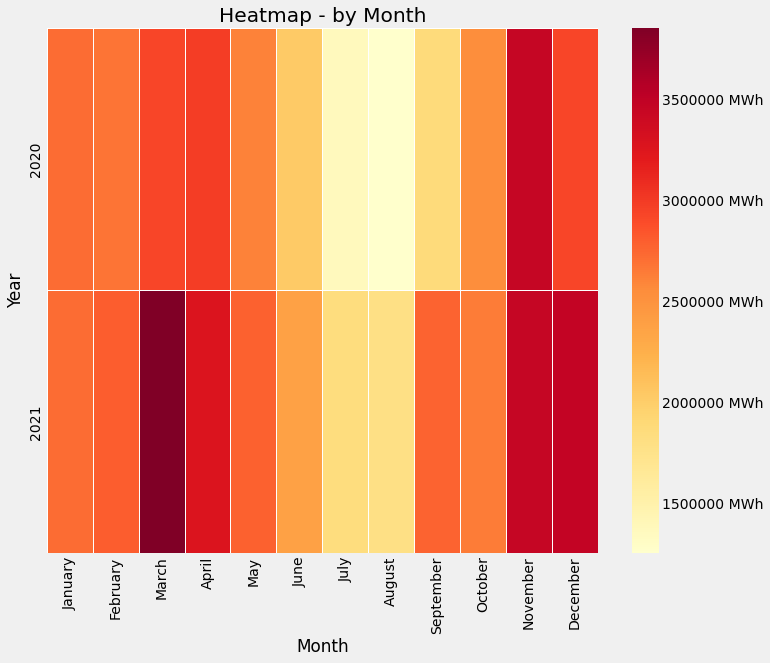

In [30]:
# Visualise electricity generated via Heatmap for monthly data
sns.heatmap(hmd, linewidths=.5, cmap='YlOrRd', cbar=True, cbar_kws={"format": '%1.0f MWh'}).set_title('Heatmap - by Month')
plt.show()

#### As we can see that renewable energy generation (Solar+Wind) is more in the starting and ending of the year which is mostly winter/fall/rainy etc. However, in the months of summer, the generation is very low. This makes sense as during summers a lot of electricity would be consumed in the PJM region(as seen from the Non-Renewable Energy Heatmaps). It is difficult to generate renewable electricity during these months as it is tough to catch up with the high demand using renewable sources. 

In [31]:
hmd1=year_week_data
hmd1 = hmd1.groupby(['Year', 'Weekday_Name']).sum()

# Reset index
hmd1 = hmd1.reset_index()

# Pivot it to a uniform data format for heatmaps
hmd1 = hmd1.pivot(index='Year', columns='Weekday_Name', values='MW_Generated')

# Reorder columns
hmd1 = hmd1[['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']]

hmd1.head(10)

Weekday_Name,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
Year,,,,,,,
2020,4035051.4,4186319.2,4193541.2,4191808.9,3892033.4,4338517.2,4525057.6
2021,5023594.3,4553229.7,4864770.9,5019357.9,4600413.7,4532411.2,5159790.3


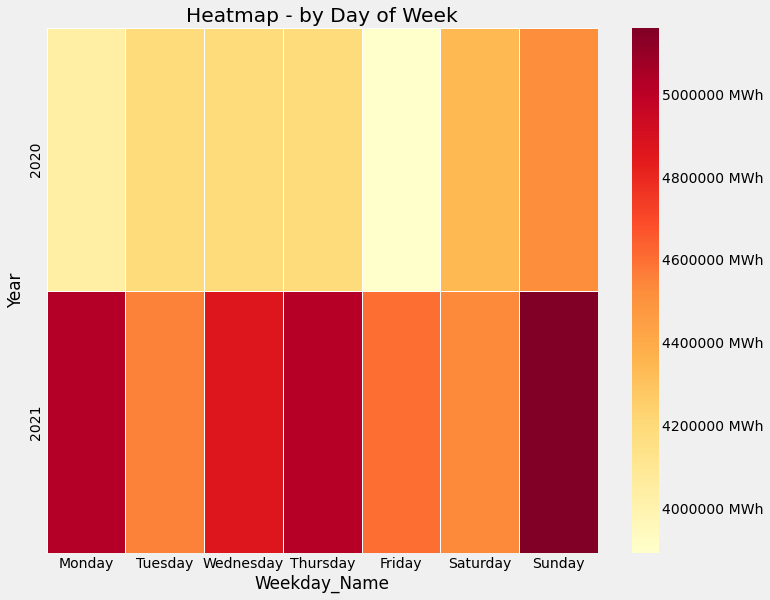

In [32]:
# Visualise renewable electricity generated via Heatmap
sns.heatmap(hmd1, linewidths=.5, cmap='YlOrRd', cbar=True, cbar_kws={"format": '%1.0f MWh'}).set_title('Heatmap - by Day of Week')
plt.show()

**The generation was high in the year 2021 as compared to 2020. This might be due to the pandemic.**

In [33]:
hmd2=year_week_data
hmd2 = hmd2.groupby(['Year', 'Fuel_Type']).sum()

# Reset index
hmd2 = hmd2.reset_index()

# Pivot it to a uniform data format for heatmaps
hmd2 = hmd2.pivot(index='Year', columns='Fuel_Type', values='MW_Generated')

# Reorder columns
hmd2 = hmd2[['Solar', 'Wind']]

hmd2.head(10)

Fuel_Type,Solar,Wind
Year,,
2020,3435161.6,25927167.3
2021,5893803.7,27859764.3


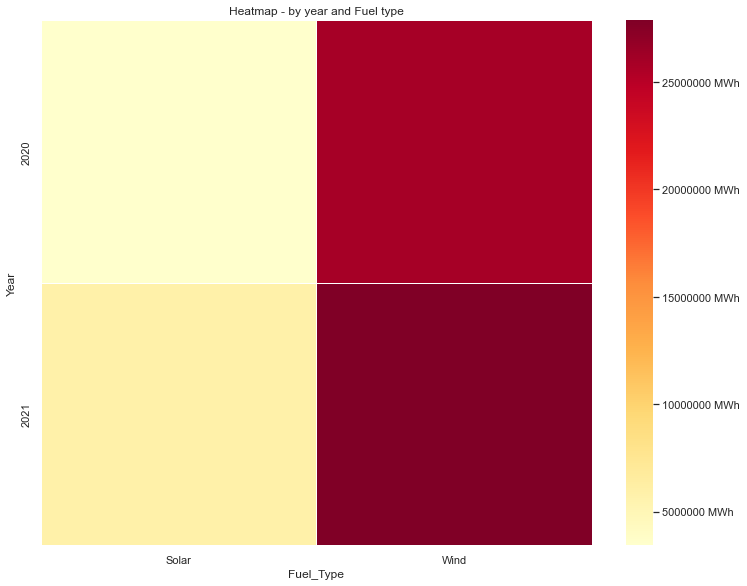

In [38]:
# Visualise renewable electricity generated via Heatmap
sns.heatmap(hmd2, linewidths=.5, cmap='YlOrRd', cbar=True, cbar_kws={"format": '%1.0f MWh'}).set_title('Heatmap - by year and Fuel type')
plt.show()

### **11. Initial Visualizations**

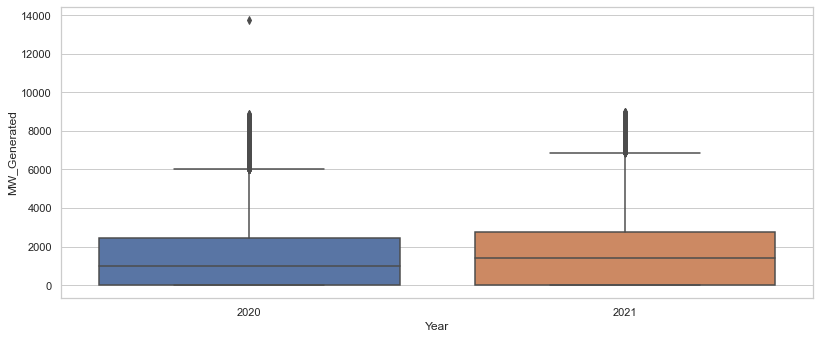

In [48]:
#Box Plot-Electricity Generation by Year

fig, ax = plt.subplots(figsize=(12,5))
sns.set(style='whitegrid')
sns.boxplot(x="Year",y="MW_Generated",data=year_week_data)
plt.show()

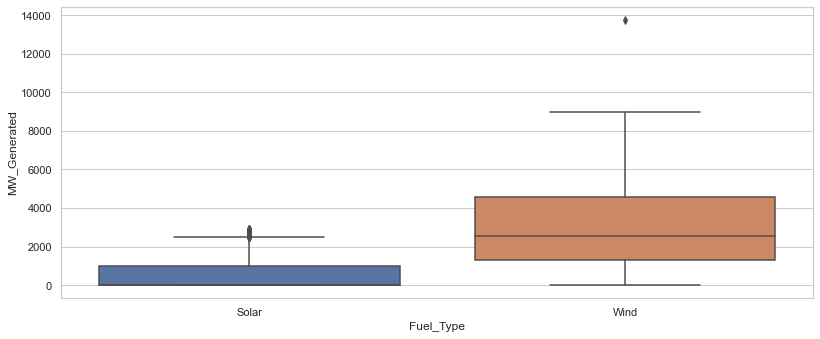

In [49]:
#Box Plot-Electricity Generation by Fuel Type
fig, ax = plt.subplots(figsize=(12,5))
sns.set(style='whitegrid')
sns.boxplot(x="Fuel_Type",y="MW_Generated",data=year_week_data)
plt.show()

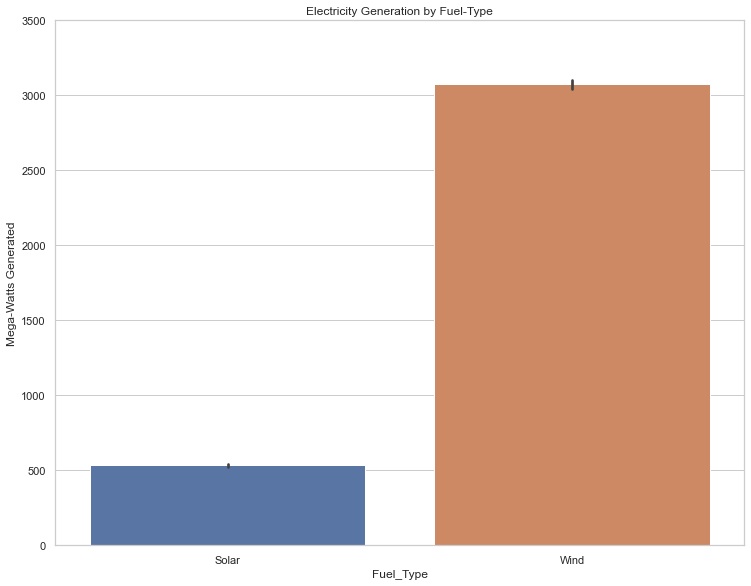

In [45]:
#Bar Plot-Electricity Generation by Fuel-Type
plt.title("Electricity Generation by Fuel-Type")

ax=sns.barplot(x = 'Fuel_Type',y = 'MW_Generated',data = year_week_data)
ax.set(xlabel='Fuel_Type', ylabel='Mega-Watts Generated')
plt.ylim(0, 3500)
plt.show()

### **12. Pandas Profiling on processed dataset to check for any other insights**

In [39]:
from pandas_profiling import ProfileReport
year_week_data.profile_report()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

### 13. Pandas profiling on initial data set before processing and cleaning

In [41]:
data_copy

,datetime_beginning_utc,datetime_beginning_ept,fuel_type,mw,fuel_percentage_of_total,is_renewable
0,12/31/2020 5:00:00 AM,12/31/2020 12:00:00 AM,Coal,17326.3,0.19,False
1,12/31/2020 5:00:00 AM,12/31/2020 12:00:00 AM,Gas,30767.9,0.35,False
2,12/31/2020 5:00:00 AM,12/31/2020 12:00:00 AM,Hydro,1747.7,0.02,True
3,12/31/2020 5:00:00 AM,12/31/2020 12:00:00 AM,Multiple Fuels,125.5,0.00,False
4,12/31/2020 5:00:00 AM,12/31/2020 12:00:00 AM,Nuclear,33996.5,0.38,False
...,...,...,...,...,...,...
96047,1/1/2021 5:00:00 AM,1/1/2021 12:00:00 AM,Other,95.9,0.00,False
96048,1/1/2021 5:00:00 AM,1/1/2021 12:00:00 AM,Other Renewables,546.9,0.01,True
96049,1/1/2021 5:00:00 AM,1/1/2021 12:00:00 AM,Solar,9.3,0.00,True
96050,1/1/2021 5:00:00 AM,1/1/2021 12:00:00 AM,Storage,0.0,0.00,False


In [40]:
from pandas_profiling import ProfileReport
data_copy.profile_report()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]